In [77]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

In [78]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

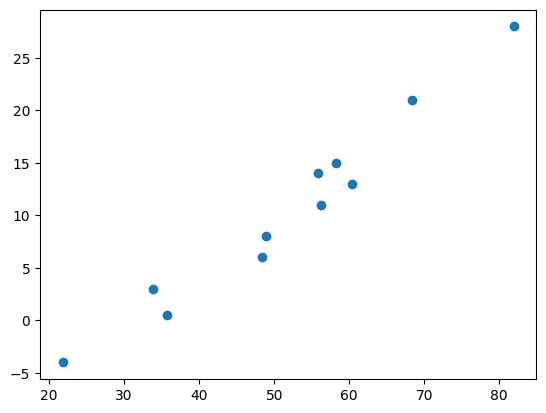

In [79]:
plt.scatter(t_u, t_c)

In [80]:
def model(t_u, w, b):
    return w*t_u + b

In [81]:
def loss_fn(t_p: torch.Tensor, t_c: torch.Tensor):
    return ((t_p-t_c)**2).mean()

In [82]:
params = torch.tensor([1., 0.], requires_grad=True)

In [83]:
params.grad is None

True

In [84]:
#loss = loss_fn(model(t_u, *params), t_c)
#loss.backward()

In [85]:
params.grad

In [86]:
def training_loop(n_epochs, learning_rate, params: torch.Tensor, t_u, t_c) -> torch.Tensor:
    for epoch in range(n_epochs):
        # zero the gradient
        if params.grad is not None:
            params.grad.zero_()
        
        # calculate prediction
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()

        with torch.no_grad():
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss {float(loss)}")

    return params

In [87]:
training_loop(
    n_epochs=5000,
    learning_rate=1e-2,
    params=torch.tensor([1., 0.], requires_grad=True),
    t_u=t_u/t_u.mean(), # remember to normalize
    t_c=t_c
)

Epoch 0, Loss 162.14451599121094
Epoch 500, Loss 20.582677841186523


Epoch 1000, Loss 9.842866897583008
Epoch 1500, Loss 5.636240005493164
Epoch 2000, Loss 3.988558292388916
Epoch 2500, Loss 3.3431906700134277
Epoch 3000, Loss 3.0904061794281006
Epoch 3500, Loss 2.991396188735962
Epoch 4000, Loss 2.95261549949646
Epoch 4500, Loss 2.937424421310425


tensor([ 27.6075, -17.0978], requires_grad=True)

# Splitting datasets

In [88]:
n_samples = t_u.shape[0]
n_val = int(0.2*n_samples)

shuffled_indices = torch.randperm(n_samples, )

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 7,  2, 10,  8,  6,  3,  4,  0,  9]), tensor([5, 1]))

In [92]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]
 
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

# normalized:
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [90]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
 
        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
 
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
 
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")
 
    return params

In [93]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
 
training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 1, Training loss 89.2897, Validation loss 40.2001
Epoch 2, Training loss 42.9957, Validation loss 7.5859
Epoch 3, Training loss 35.9978, Validation loss 5.1593
Epoch 500, Training loss 7.4615, Validation loss 2.4141
Epoch 1000, Training loss 3.8338, Validation loss 1.6143
Epoch 1500, Training loss 3.3591, Validation loss 1.4178
Epoch 2000, Training loss 3.2970, Validation loss 1.3589
Epoch 2500, Training loss 3.2889, Validation loss 1.3391
Epoch 3000, Training loss 3.2878, Validation loss 1.3322


tensor([  5.3320, -17.1560], requires_grad=True)